In [11]:
# reference : https://blog.naver.com/PostView.nhn?blogId=owl6615&logNo=221797466174&categoryNo=119&parentCategoryNo=118&viewDate=&currentPage=1&postListTopCurrentPage=1&from=postView
import nltk
from konlpy.tag import Twitter
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from bs4 import BeautifulSoup

import urllib
from urllib.request import urlopen

import warnings
warnings.filterwarnings('ignore')

import matplotlib
matplotlib.rc('font', family='Malgun Gothic')

import matplotlib.pyplot as plt
import time, re

In [20]:
def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print('\r%s |%s| %s%% %s' % (prefix, bar, percent, suffix), end = printEnd)
    # Print New Line on Complete
    if iteration == total: 
        print()

In [22]:
txt = []

hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')

ran = 5000

printProgressBar(0, ran, prefix = 'Progress:', suffix = 'Complete', length = 50)
for i in range(ran):
    tmp1= f'https://kin.naver.com/search/list.nhn?query=%EC%BD%94%EB%A1%9C%EB%82%98&page={i}'
    openurl = urlopen(tmp1)
    soup = BeautifulSoup(openurl,'html.parser')
    tmp = soup.find_all('a', class_="_nclicks:kin.txt _searchListTitleAnchor")
    for tag in tmp:
        url = str(tag).split(' ')[4:]
        for j in url:
            result = hangul.sub('', j)
            txt.append(result)
    
    printProgressBar(i + 1, ran, prefix = 'Progress:', suffix = 'Complete', length = 50)

HTTPError: HTTP Error 403: Forbidden

In [23]:
word_dict = {}
for each_word in txt:
    if each_word not in word_dict.keys():
        word_dict[each_word] = 1
    else:
        word_dict[each_word] += 1

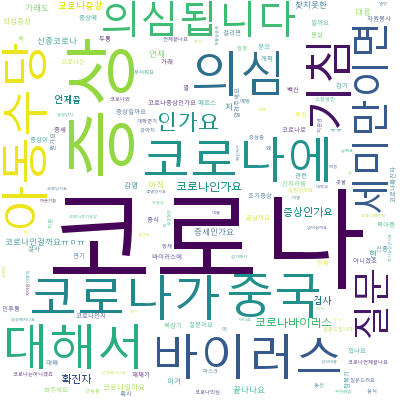

In [26]:
wc = WordCloud(font_path='C:\\Windows\\Fonts\\malgun.ttf', width=400, height=400, background_color='white')
wc.fit_words(word_dict)
wc.to_image()

In [59]:
rmWord = ['', '질문', '저']
word_dict = { word : v for word, v in word_dict.items() if word not in rmWord}

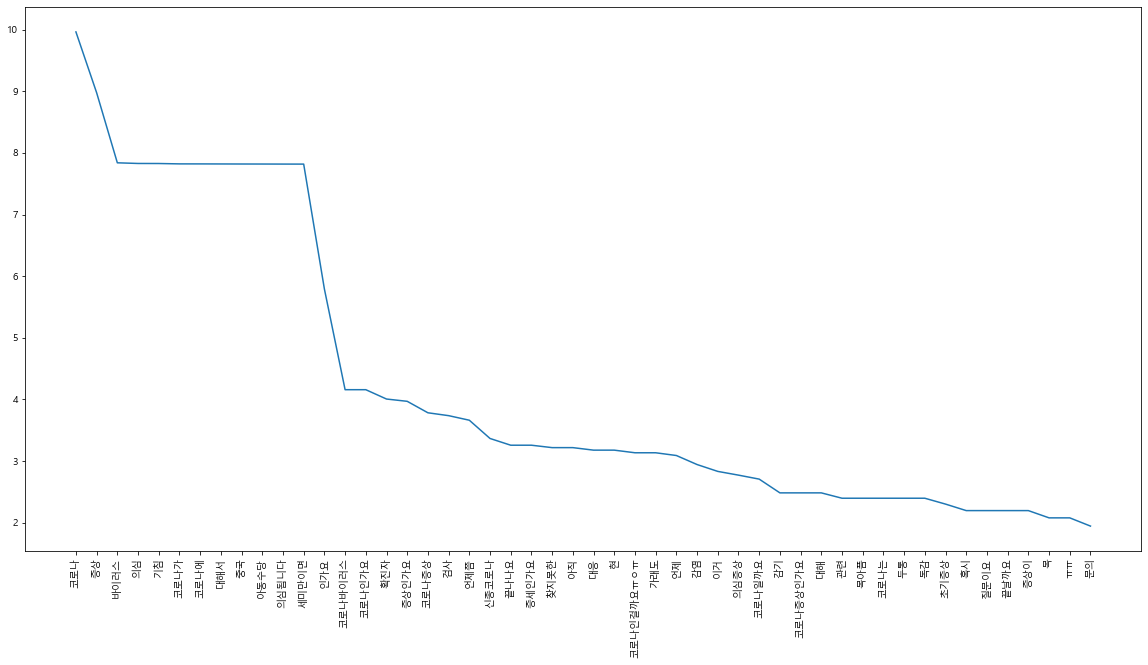

In [60]:
import numpy as np
lists = sorted(word_dict.items(), key=lambda x : x[1])[::-1]
x, y = zip(*lists[:50])
plt.figure(figsize=(20, 10))
plt.plot(x, np.log(y))
plt.xticks(rotation=90)
plt.show()